In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np

from modules.drawFig import removeN1, draw_surface3D

In [2]:
# example: single node perturbation analysis

datadir = './result/TGFOFF/'
data_name = 'TGFOFF_single_deltaF_normalized_out.csv' # TGFOFF&RASON
data_act_name = datadir + 'TGFOFF_single_simul_result.csv'

data = pd.read_csv(datadir + data_name, index_col = 0).iloc[1:,:]
data = data.dropna(axis=1)
data_act = pd.read_csv(data_act_name, index_col = 0)

selected_idx = [x for x in set(data_act.index)&set(data.index) if removeN1(x)]
dat = data.loc[selected_idx,:]
dat_act = data_act.loc[selected_idx,:]
pheno = dat_act.Diff_pheno
dat_act9 = dat_act.copy().iloc[:,:9]

#dat
#dat_act9

In [3]:
# 2D plane

model_result_pca = StandardScaler().fit_transform(dat_act9)
model2 = PCA(2).fit(model_result_pca)
Xcoor0 = model2.fit_transform(model_result_pca)

color_dict = {'1':'#9E0142','0':'#F39001','-1':'#5E4FA2'}
df = pd.DataFrame([], columns = ['PC1','PC2','Fvalue','Pheno','Fm'])
df.loc[:,'PC1'] = Xcoor0[:,0]
df.loc[:,'PC2'] = Xcoor0[:,1]
df.loc[:,'Fvalue'] = dat.Fvalue.values # Sum of frustrated_influence
df.loc[:,'Pheno'] = [color_dict[str(x)] for x in [int(x) for x in pheno]]
df.loc[:,'Fm'] = list(dat_act.F_major_att) # frustration of major attractor

(8, 3)
(42, 3)
(6, 3)


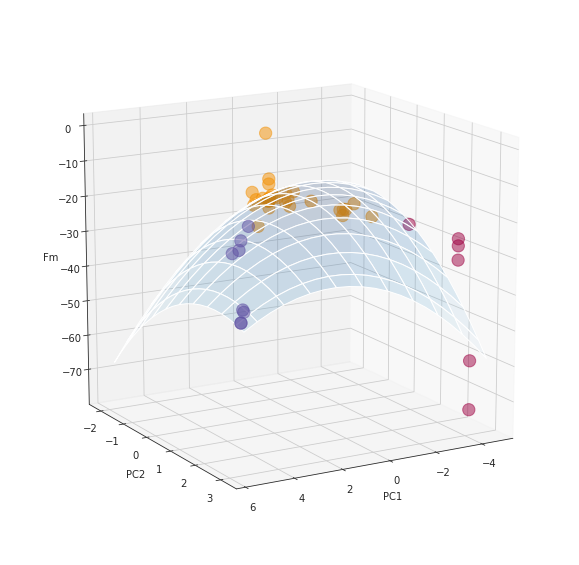

In [4]:
sns.set_style('ticks')
axis_name = ['PC1','PC2','Fm'] # z-axis is frustration of network state
surface_color = 'Blues'
draw_surface3D(df, axis_name, surface_color) 